In [1]:
import numpy as np
import matplotlib.pyplot as plt
import contextlib

In [2]:
evlp = np.load('envelope_1ln.npy')

In [3]:
samples = np.load('samples.npz')

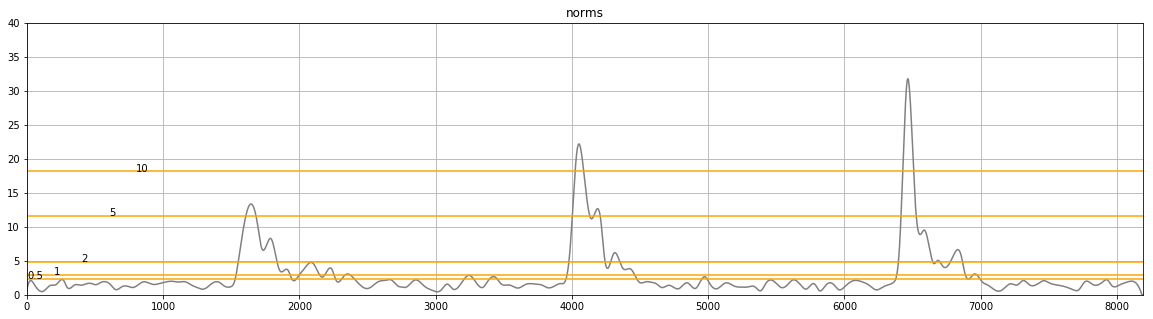

In [4]:
@contextlib.contextmanager
def plot(title):
    plt.figure(figsize=(20,5))
    plt.title(title)
    yield
    plt.xlim(0, 8192)
    ylim = 40
    plt.ylim(0,ylim)
    plt.grid(True)
    plt.show()
    
evlp[evlp<0] = 0
def labeled_norm(p):
    norm = np.mean(evlp**p)**(1/p)
    return norm, f'{p}'

with plot('norms'):
    plt.plot(evlp, color='gray')
    for i, p in enumerate([0.5, 1, 2, 5, 10]):
        n, label = labeled_norm(p)
        plt.axhline(n, color='orange')
        plt.text(i*200, n, label)


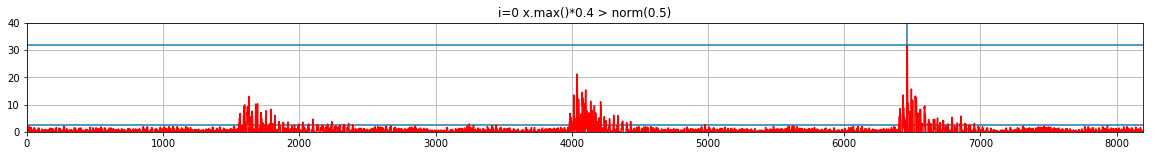

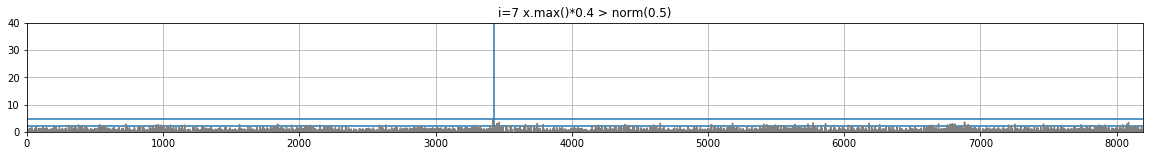

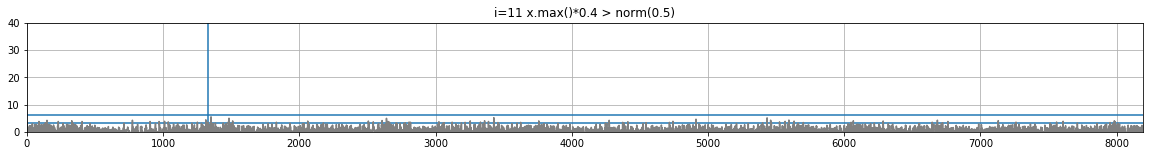

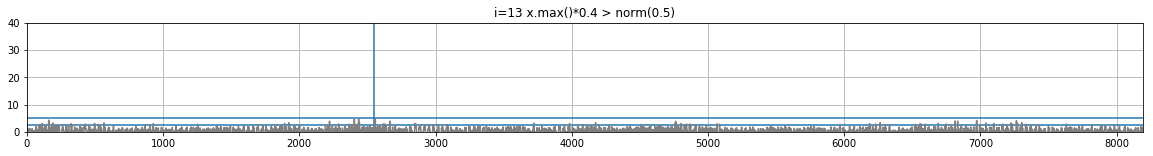

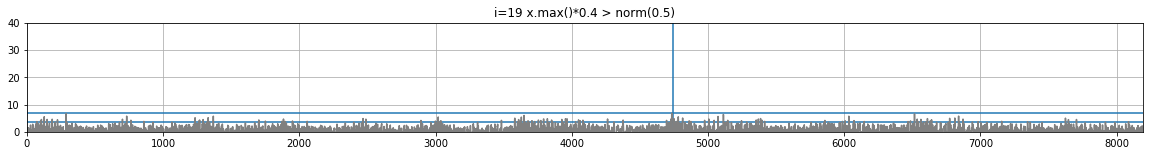

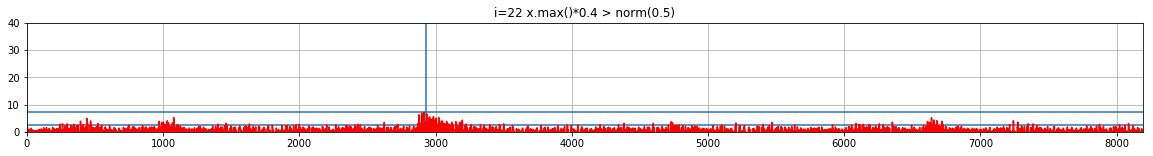

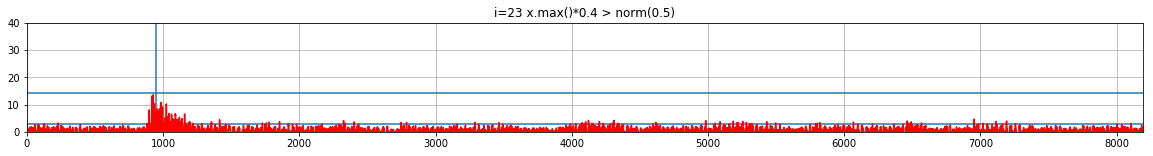

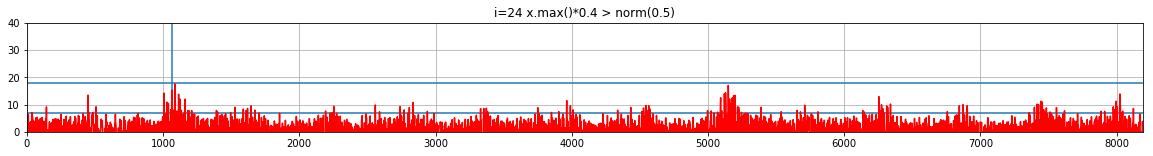

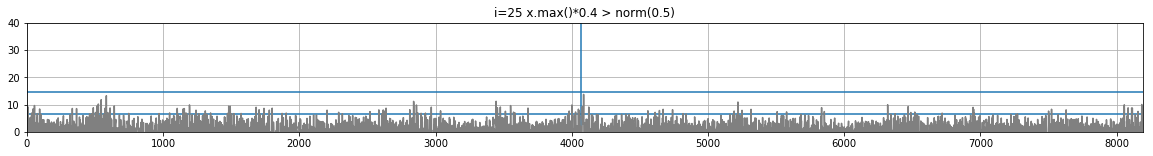

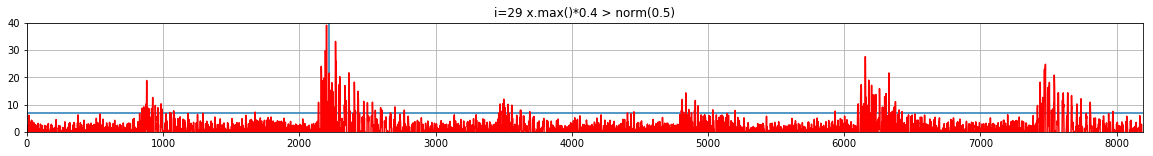

In [7]:
from eeea import eeea

def criterion1(x):
    x[x<0] = 0
    def norm(p):
        return np.mean(x**p)**(1/p)
    return norm(0.5), x.max(), x.max()*0.4 > norm(0.5) 

@contextlib.contextmanager
def plot(title):
    plt.figure(figsize=(20,2))
    plt.title(title)
    yield
    plt.xlim(0, 8192)
    ylim = 40
    plt.ylim(0,ylim)
    plt.grid(True)
    plt.show()

for i, k in enumerate(samples.files):
    if i not in [0,7,11,13, 19,22,23,24,25,29]: continue
    with plot(f"i={i} x.max()*0.4 > norm(0.5)"):
        x = samples[k]
        x = envelope = eeea(x, ts=0.008, fs=12800)
        norm, maxima, is_fault = criterion1(x)
        plt.axhline(norm)
        plt.axhline(maxima)
        plt.axvline(x.argmax())
        plt.plot(samples[k], color='red' if is_fault else 'gray')
        


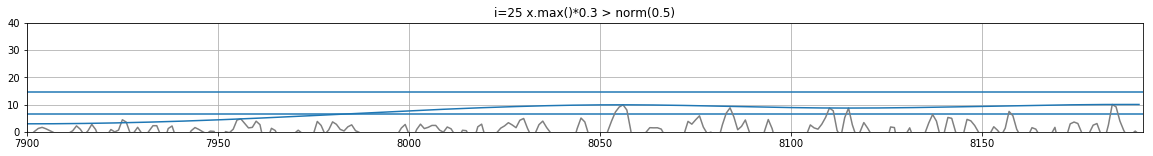

In [6]:
from eeea import eeea

def c2(x):
    x[x<0] = 0
    def norm(p):
        return np.mean(x**p)**(1/p)
    c21 = norm(0.5), x.max(), x.max()*0.4 > norm(0.5) 
    
    
    c22 = 

@contextlib.contextmanager
def plot(title):
    plt.figure(figsize=(20,2))
    plt.title(title)
    yield
    plt.xlim(0, 8192)
    ylim = 40
    plt.ylim(0,ylim)
    plt.grid(True)
    plt.show()

for i, k in enumerate(samples.files):
    if i not in [0,7,11,13, 19,22,23,24,25,29]: continue
    with plot(f"i={i} x.max()*0.4 > norm(0.5)"):
        x = samples[k]
        x = envelope = eeea(x, ts=0.008, fs=12800)
        norm, maxima, is_fault = criterion1(x)
        plt.axhline(norm)
        plt.axhline(maxima)
        plt.axvline(x.argmax())
        plt.plot(samples[k], color='red' if is_fault else 'gray')